In [11]:
me = 9.109e-31
h = 6.626e-34
a = 1e-12
c = 2.99e8
cm_per_m = 100
print(h**2*5/(8*a**2*me))
print(h/(8*a**2*me*c)/cm_per_m)

3.012396805357339e-13
3041021944.924917


In [13]:
print(3041021944.924917/578**2*(3*3-2*2))

45512.83427109526


In [14]:
print(3041021944.924917/234.6**2*(13*13-3*3))

8840636.239006279


In [15]:
print(3041021944.924917/481.7**2*(13*13-2*2))

2162470.570320745


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# plot a frame

def plot_frame(t, x0, v, a):
    x = x0 + v*t
    if x > a:
        x = 2*a-x
        v *= -1
    elif x < 0:
        x = -x
        v*= -1
    # setup plot parameters
    fig = plt.figure(figsize=(6,4), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.plot(x,0,marker='o',markersize=30)
    ax.set_xlabel(r'$x/a$',size=20)
    ax.get_yaxis().set_visible(False)
    plt.ylim((-0.03,0.03))
    plt.xlim((0.0,1.0))
    plt.savefig(f'./img/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()

In [40]:
a = 1.0
v = a/100
x0 = 0
plot_frame(120, x0, v, a)

In [57]:
import numpy as np
time = np.arange(0,50)
a = 1.0
v = a/25
x0 = 0
for t in time:
    plot_frame(t, x0, v, a)

In [58]:
import imageio
frames = []
for t in time:
    #image = iio.imread(f'./img/img_{t}.png')
    image = imageio.imread(f'./img/img_{t}.png')
    frames.append(image)

In [60]:
imageio.mimsave('./img/particle_in_a_box.gif', # output gif
                frames,          # array of input frames
                fps = 10)         # optional: frames per second

In [78]:
def plot_sin_frame(t, x0, v, a, n):
    x = x0 + v*t
    if x > a:
        x = 2*a-x
        v *= -1
    elif x < 0:
        x = -x
        v*= -1
    # setup plot parameters
    fig = plt.figure(figsize=(6,4), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.plot(x,np.sin(n*np.pi*x/a),marker='o',markersize=30)
    all_x = np.arange(0,a,0.01)
    ax.plot(all_x,np.sin(n*np.pi*all_x/a),'--',lw=2)
    ax.set_xlabel(r'$x/a$',size=20)
    ax.get_yaxis().set_visible(False)
    plt.ylim((-1,1))
    plt.xlim((0.0,1.0))
    #plt.show();
    plt.savefig(f'./img/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()

In [70]:
a = 1.0
v = a/100
x0 = 0
n = 1
plot_sin_frame(1, x0, v, a, n)

In [71]:
import numpy as np
time = np.arange(0,50)
a = 1.0
n = 1
v = a/25
x0 = 0
for t in time:
    plot_sin_frame(t, x0, v, a, 1)
frames = []
for t in time:
    #image = iio.imread(f'./img/img_{t}.png')
    image = imageio.imread(f'./img/img_{t}.png')
    frames.append(image)
imageio.mimsave('./img/particle_in_sin_wave.gif', # output gif
                frames,          # array of input frames
                fps = 10)         # optional: frames per second

![title](img/particle_in_sin_wave.gif)

In [75]:
import numpy as np
time = np.arange(0,100)
a = 1.0
n = 3
v = a/50
x0 = 0
for t in time:
    plot_sin_frame(t, x0, v, a, n)
frames = []
for t in time:
    #image = iio.imread(f'./img/img_{t}.png')
    image = imageio.imread(f'./img/img_{t}.png')
    frames.append(image)
imageio.mimsave('./img/particle_in_sin_wave_n_3.gif', # output gif
                frames,          # array of input frames
                fps = 10)   

![title](img/particle_in_sin_wave_n_3.gif)

In [79]:
import numpy as np
time = np.arange(0,100)
a = 1.0
n = 4
v = a/50
x0 = 0
for t in time:
    plot_sin_frame(t, x0, v, a, n)
frames = []
for t in time:
    #image = iio.imread(f'./img/img_{t}.png')
    image = imageio.imread(f'./img/img_{t}.png')
    frames.append(image)
imageio.mimsave('./img/particle_in_sin_wave_n_4.gif', # output gif
                frames,          # array of input frames
                fps = 10)  

![title](img/particle_in_sin_wave_n_4.gif)

In [145]:
def plot_classical_wave_frame(t, nu, max_n):
    a = 1
    # setup plot parameters
    fig = plt.figure(figsize=(6,4), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    all_x = np.arange(0,a,0.01)
    n = 1
    partial_sum = np.sin(n*np.pi*all_x/a)*np.cos(nu*n*t/(2*a))
    ax.plot(all_x,partial_sum,'--',lw=2, label="n=1")
    n = 2
    partial_sum += np.sin(n*np.pi*all_x/a)*np.cos(nu*n*t/(2*a)+np.pi/2)
    ax.plot(all_x,np.sin(n*np.pi*all_x/a)*np.cos(nu*n*t/(2*a)+np.pi/2),'--',lw=2, label="n=2") 
    ax.plot(all_x,partial_sum,'-',lw=3, label="u(x,t)")
    plt.legend(fontsize=12)
    ax.set_xlabel(r'$x/l$',size=20)
    ax.get_yaxis().set_visible(False)
    plt.ylim((-2,2))
    plt.xlim((0.0,1.0))
#    plt.show();
    plt.savefig(f'./img/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()

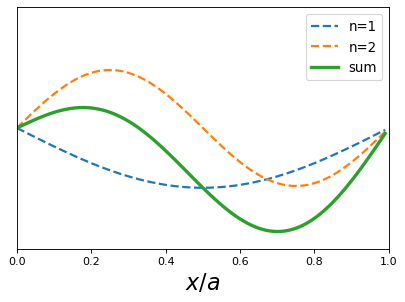

In [131]:
plot_classical_wave_frame(12,0.2,1)

In [146]:
import numpy as np
time = np.arange(0,120)
for t in time:
    plot_classical_wave_frame(t,0.1,1)
frames = []
for t in time:
    #image = iio.imread(f'./img/img_{t}.png')
    image = imageio.imread(f'./img/img_{t}.png')
    frames.append(image)
imageio.mimsave('./img/classical_wave_two_modes_v02.gif', # output gif
                frames,          # array of input frames
                fps = 10)  

![title](img/classical_wave_two_modes_v02.gif)

![title](img/classical_wave_three_modes_v01.gif)